<a href="https://colab.research.google.com/github/zdwhite/Thinkful-Unit-2/blob/master/Naive_Bayes_Spam_Filter_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

In [0]:
sms_raw['allcaps'] = sms_raw.message.str.isupper()

sms_raw['message']=sms_raw.message.str.lower()

In [0]:
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent','private','win','reward','quiz','claim']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [0]:
sms_raw['spam'] = (sms_raw['spam'] == 'spam')
# Note that if you run this cell a second time everything will become false.
# So... Don't.

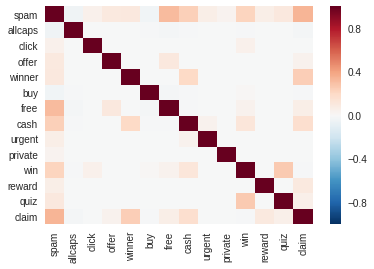

In [161]:
sns.heatmap(sms_raw.corr())

# At this point if there were any words that showed high correlation to one another
# They could possibly be combined with PCA

In [0]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

In [163]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 499


In [51]:
#sms_raw
sms_raw[sms_raw['spam']==True]

,spam,message,allcaps,click,offer,winner,buy,free,cash,urgent,private,win,reward
2,True,free entry in 2 a wkly comp to win fa cup fina...,False,False,False,False,False,False,False,False,False,True,False
5,True,freemsg hey there darling it's been 3 week's n...,False,False,False,False,False,False,False,False,False,False,False
8,True,winner!! as a valued network customer you have...,False,False,False,False,False,False,False,False,False,False,False
9,True,had your mobile 11 months or more? u r entitle...,False,False,False,False,False,True,False,False,False,False,False
11,True,"six chances to win cash! from 100 to 20,000 po...",False,False,False,False,False,False,False,False,False,True,False
12,True,urgent! you have won a 1 week free membership ...,False,False,False,False,False,True,False,False,False,False,False
15,True,"xxxmobilemovieclub: to use your credit, click ...",False,True,False,False,False,False,False,False,False,False,False
19,True,england v macedonia - dont miss the goals/team...,False,False,False,False,False,False,False,False,False,False,False
34,True,thanks for your subscription to ringtone uk yo...,False,False,False,False,False,False,False,False,False,False,False
42,True,07732584351 - rodger burns - msg = we tried to...,False,False,False,False,False,True,False,False,False,False,False


In [151]:
#let's come up with some better feature words for our classifier
#First by doing a simple frequency count of the words that are in spam messages
# Second do a frequency count of words that are ham

#then we'll over lap the distributions and see what key words create too many false positives

spam = sms_raw[sms_raw['spam']==True]['message'].apply(lambda x:x.split())

ham  = sms_raw[sms_raw['spam']!=True]['message'].apply(lambda x:x.split())

ham.head()

0    [go, until, jurong, point,, crazy.., available...
1                 [ok, lar..., joking, wif, u, oni...]
3    [u, dun, say, so, early, hor..., u, c, already...
4    [nah, i, don't, think, he, goes, to, usf,, he,...
6    [even, my, brother, is, not, like, to, speak, ...
Name: message, dtype: object

In [152]:
spam=pd.DataFrame(spam)


spam = spam.apply(lambda x: pd.Series(x['message']),axis=1).stack().reset_index(level=1, drop=True).reset_index()
spam.columns=['Index','Words']
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17862 entries, 0 to 17861
Data columns (total 2 columns):
Index    17862 non-null int64
Words    17862 non-null object
dtypes: int64(1), object(1)
memory usage: 279.2+ KB


In [156]:

spam['Words'].value_counts()

#'claim' is high on the list of keywords not used in our feature list.


to                           685
a                            375
call                         342
your                         263
you                          252
the                          204
for                          202
or                           188
free                         180
2                            169
is                           152
ur                           144
on                           142
txt                          136
have                         135
from                         127
and                          122
u                            117
text                         112
mobile                       109
with                         108
claim                        106
reply                        101
&                             98
of                            95
4                             93
now                           93
stop                          90
this                          86
our                           85
          